<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 6. Integration
## Extended quadrature integration methods
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we extend the simple integration rules to the full quadrature rules by sub-dividing the
integral interval $[a,b]$ into $n$ sub-intervals.

First, we load the standrd `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function

We then define a function $f$, which should be integrated between $x \in [a,b]$:
$$
\int\limits_a^b f(x) dx
$$

Example:
$$
\int\limits_{0}^{\pi} \sin x dx
= \left[-\cos x \right]_{0}^{\pi}
= -\cos (\pi) - (-\cos 0)
= -(-1) + 1
= 2
$$

In [2]:
def int_f(x):
    '''
    #----------------------------------------------------------------------
    # function f(x)
    #----------------------------------------------------------------------
    '''
    int_f = np.sin(x)
    return int_f

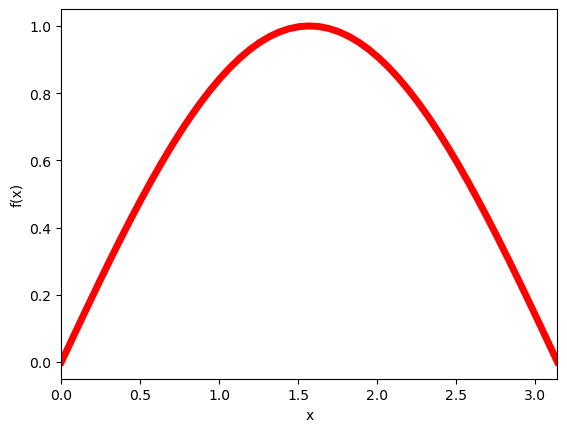

In [3]:
a = 0.
b = np.pi
x = np.linspace(a,b,51)
y = int_f(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([a,b])
#plt.ylim([-0.1,1.1])
plt.plot(x,y,linewidth=5,color='red',label='sin(x)')

## Trapez rule

The **Trapez rule** needs $n+1$ calculations of the function $f$:

$$
 \int\limits_a^b f(x) dx 
 = \frac{h}{2} 
   \left[ f(a) 
          +2 \sum\limits_{j=1}^{n-1} f(x_{j})
          +f(b)                  
   \right]
$$

In [4]:
def int_trapez (int_f,a,b,n):
    '''
    #----------------------------------------------------------------------
    # function integrates the function f(x) between a and b
    # using the extended Trapezoidal rule for n subintervals
    # input:
    # a        - lower integration limit
    # b        - upper integration limit
    # n        - number of sub-intervals
    # f        - external function
    # output:
    # int_trapez - value of interval
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    # calculate stepsize
    h = (b-a) / float(n)
    # calculate integral
    int_trapez = int_f(a) + int_f(b)
    for i in np.arange(1,n): # i = 1,n-1
        int_trapez = int_trapez + 2.0*int_f(a+i*h)
    int_trapez = h / 2.0 * int_trapez
    return int_trapez

In [6]:
print("%3s %10s %10s" % ('n','Trapez','Error[%]'))
for n in range(2,19,2):
    I1 = int_trapez(int_f,a,b,n)
    print("%3i %10.6f %10.6f" % (n,I1,100*np.abs(I1-2.)))

  n     Trapez   Error[%]
  2   1.570796  42.920367
  4   1.896119  10.388110
  6   1.954097   4.590277
  8   1.974232   2.576840
 10   1.983524   1.647646
 12   1.988564   1.143622
 14   1.991600   0.839957
 16   1.993570   0.642966
 18   1.994920   0.507954


## Simpson rule

The **Simpson rule** needs $n+1$ calculations of the function $f$:

$$
\int\limits_a^b f(x) dx 
 = \frac{h}{3} 
   \left[ f(a) 
          +2 \sum\limits_{j=1}^{{n \over 2}-1} f(x_{2j})
          +4 \sum\limits_{j=1}^{{n \over 2}} f(x_{2j-1})
          +f(b)                  
   \right]
$$

In [7]:
def int_simpson (int_f,a,b,n):
    '''
    #----------------------------------------------------------------------
    # function integrates the function f(x) between a and b
    # using the extended Simpson rule for n subintervals
    # input:
    # a        - lower integration limit
    # b        - upper integration limit
    # n        - number of sub-intervals
    # f        - external function
    # output:
    # int_simpson - value of interval
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    # calculate stepsize
    if (n%2 != 0):
        exit ('int_simpson: n must be even')
    h = (b-a) / float(n)
    int_simpson = int_f(a) + int_f(b)
    for i in np.arange(1,n/2):  # i = 1,n/2-1
        int_simpson = int_simpson + 2.0*int_f(a+(2*i)*h)
    for i in np.arange(1,n/2+1): #  1,n/2
        int_simpson = int_simpson + 4.0*int_f(a+(2*i-1)*h)
    int_simpson = h/3.0 * int_simpson
    return int_simpson

In [9]:
print("%3s %10s %10s %10s %10s" % ('n','Trapez','Error[%]','Simpson','Error[%]'))
for n in range(2,19,2):
    I1 = int_trapez(int_f,a,b,n)
    I2 = int_simpson(int_f,a,b,n)
    print("%3i %10.6f %10.6f %10.6f %10.6f" % (n,I1,100*np.abs(I1-2.),I2,100*np.abs(I2-2.)))

  n     Trapez   Error[%]    Simpson   Error[%]
  2   1.570796  42.920367   2.094395   9.439510
  4   1.896119  10.388110   2.004560   0.455975
  6   1.954097   4.590277   2.000863   0.086319
  8   1.974232   2.576840   2.000269   0.026917
 10   1.983524   1.647646   2.000110   0.010952
 12   1.988564   1.143622   2.000053   0.005262
 14   1.991600   0.839957   2.000028   0.002834
 16   1.993570   0.642966   2.000017   0.001659
 18   1.994920   0.507954   2.000010   0.001035


[next>](Numerics_lab06_gauss.ipynb)